In [132]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
train_data = pd.read_excel(r"C:\Users\Ameen\ML PROJECTS\Predict Prices of Airline Tickets\Data_train.xlsx")
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [133]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [134]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [135]:
train_data.shape

(10683, 11)

In [136]:
train_data[train_data['Total_Stops'].isnull()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


In [137]:
train_data.dropna(inplace= True)
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [138]:
data = train_data.copy()
data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662


In [139]:
data.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [140]:
def change_into_datetime(col):
    data[col] = pd.to_datetime(data[col])

In [141]:
for feature in ['Date_of_Journey' , 'Dep_Time' , 'Arrival_Time']:
    change_into_datetime(feature)

In [142]:
data.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

In [143]:
data['Journey_day'] = data['Date_of_Journey'].dt.day
data['Journey_day']

0        24
1         5
2         6
3         5
4         3
         ..
10678     4
10679    27
10680    27
10681     3
10682     5
Name: Journey_day, Length: 10682, dtype: int64

In [144]:
data['Journey_Month'] = data['Date_of_Journey'].dt.month
data['Journey_Month']

0         3
1         1
2         9
3        12
4         1
         ..
10678     9
10679     4
10680     4
10681     1
10682     9
Name: Journey_Month, Length: 10682, dtype: int64

In [145]:
data['Journey_Year'] = data['Date_of_Journey'].dt.year
data['Journey_Year']

0        2019
1        2019
2        2019
3        2019
4        2019
         ... 
10678    2019
10679    2019
10680    2019
10681    2019
10682    2019
Name: Journey_Year, Length: 10682, dtype: int64

In [146]:
data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_Month,Journey_Year
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2022-05-12 22:20:00,2022-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2022-05-12 05:50:00,2022-05-12 13:15:00,7h 25m,2 stops,No info,7662,5,1,2019


In [147]:
data.drop("Date_of_Journey", axis = 1 , inplace = True)
data.head(2)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_Month,Journey_Year
0,IndiGo,Banglore,New Delhi,BLR → DEL,2022-05-12 22:20:00,2022-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2022-05-12 05:50:00,2022-05-12 13:15:00,7h 25m,2 stops,No info,7662,5,1,2019


In [148]:
def extract_hour_min(df,col):
    df[col+'_hour'] = df[col].dt.hour
    df[col+'_minute'] = df[col].dt.minute
    df.drop(col,axis=1,inplace = True)
    return df.head(2)

In [149]:
extract_hour_min(data,'Dep_Time')

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_Month,Journey_Year,Dep_Time_hour,Dep_Time_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2022-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2022-05-12 13:15:00,7h 25m,2 stops,No info,7662,5,1,2019,5,50


In [150]:
extract_hour_min(data,'Arrival_Time')

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_Month,Journey_Year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,2019,5,50,13,15


In [151]:
def flight_dep_time(x):
    if (x > 4) and (x <= 8):
        return 'Early Morning'
    elif (x > 8) and (x <= 12):
        return 'Morning'
    elif(x > 12) and (x <= 16):
        return 'Noon'
    elif(x > 16) and (x <= 20):
        return 'Evening'
    elif(x > 20) and (x <= 24):
        return 'Night'
    else:
        return 'Late Night'

In [152]:
data['Dep_Time_hour'].apply(flight_dep_time)

0                Night
1        Early Morning
2              Morning
3              Evening
4                 Noon
             ...      
10678          Evening
10679          Evening
10680    Early Morning
10681          Morning
10682          Morning
Name: Dep_Time_hour, Length: 10682, dtype: object

<AxesSubplot:>

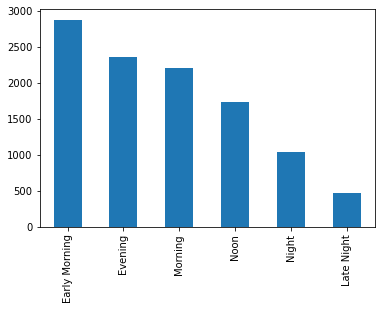

In [153]:
data['Dep_Time_hour'].apply(flight_dep_time).value_counts().plot(kind = 'bar')

In [154]:
!pip install plotly
!pip install cufflinks

In [155]:

import plotly
import cufflinks as cf
from cufflinks.offline import go_offline
from plotly.offline import download_plotlyjs , init_notebook_mode , plot , iplot

In [156]:
!pip install chart_studio

In [157]:
# data['Dep_Time_hour'].apply(flight_dep_time).value_counts().iplot(kind = 'bar')

In [158]:
def preprocessing_duration(x):
    if 'h' not in x:
        x = '0h '+ x
    elif 'm' not in x:
        x =  x +' 0m'
    return x

In [159]:
data['Duration'] = data['Duration'].apply(preprocessing_duration)

In [160]:
data['Duration_hours'] = data['Duration'].apply(lambda x :int(x.split(' ')[0][0:-1]))

In [161]:
data['Duration_minutes'] = data['Duration'].apply(lambda x :int(x.split(' ')[1][0:-1]))

In [162]:
data.head(3)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_Month,Journey_Year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,2019,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,6,9,2019,9,25,4,25,19,0


In [163]:
data['Duration'].str.replace('h','*60').str.replace(' ','+').str.replace('m' , '*1').apply(eval)

0         170
1         445
2        1140
3         325
4         285
         ... 
10678     150
10679     155
10680     180
10681     160
10682     500
Name: Duration, Length: 10682, dtype: int64

In [164]:
# Eval takes numbers in string format and return it in value

In [165]:
data['Duration_total_mins'] = data['Duration'].str.replace('h','*60').str.replace(' ','+').str.replace('m' , '*1').apply(eval)

In [166]:
data.head(3)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_Month,Journey_Year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_minutes,Duration_total_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10,2,50,170
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,2019,5,50,13,15,7,25,445
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,6,9,2019,9,25,4,25,19,0,1140


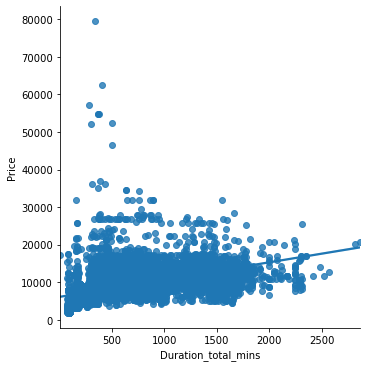

In [167]:
sns.lmplot(x= "Duration_total_mins" , y = "Price" , data = data)

In [168]:
data['Destination'].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

<AxesSubplot:ylabel='Destination'>

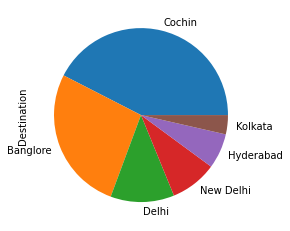

In [169]:
data['Destination'].value_counts().plot(kind = 'pie')

In [170]:
data['Route']

0                    BLR → DEL
1        CCU → IXR → BBI → BLR
2        DEL → LKO → BOM → COK
3              CCU → NAG → BLR
4              BLR → NAG → DEL
                 ...          
10678                CCU → BLR
10679                CCU → BLR
10680                BLR → DEL
10681                BLR → DEL
10682    DEL → GOI → BOM → COK
Name: Route, Length: 10682, dtype: object

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'IndiGo'),
  Text(1, 0, 'Air India'),
  Text(2, 0, 'Jet Airways'),
  Text(3, 0, 'SpiceJet'),
  Text(4, 0, 'Multiple carriers'),
  Text(5, 0, 'GoAir'),
  Text(6, 0, 'Vistara'),
  Text(7, 0, 'Air Asia'),
  Text(8, 0, 'Vistara Premium economy'),
  Text(9, 0, 'Jet Airways Business'),
  Text(10, 0, 'Multiple carriers Premium economy'),
  Text(11, 0, 'Trujet')])

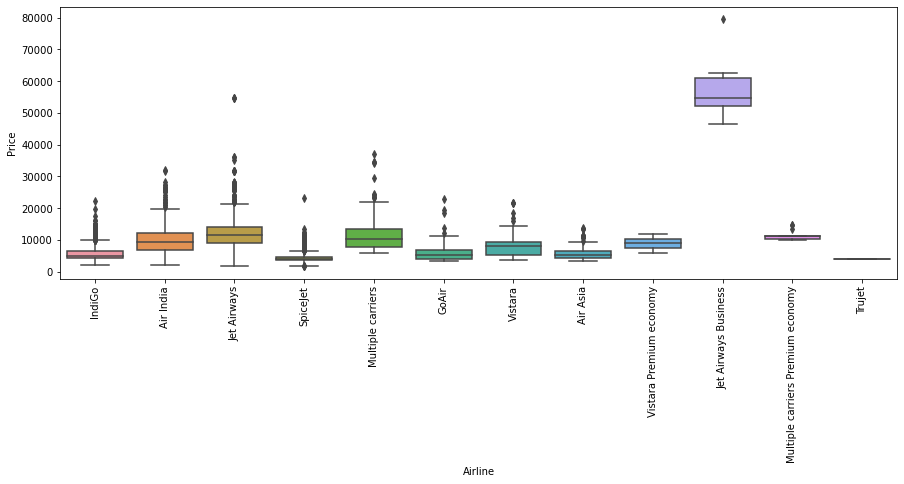

In [171]:
plt.figure(figsize = (15,5))
sns.boxplot(y='Price' , x = 'Airline' , data=data)
plt.xticks(rotation = 'vertical')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'IndiGo'),
  Text(1, 0, 'Air India'),
  Text(2, 0, 'Jet Airways'),
  Text(3, 0, 'SpiceJet'),
  Text(4, 0, 'Multiple carriers'),
  Text(5, 0, 'GoAir'),
  Text(6, 0, 'Vistara'),
  Text(7, 0, 'Air Asia'),
  Text(8, 0, 'Vistara Premium economy'),
  Text(9, 0, 'Jet Airways Business'),
  Text(10, 0, 'Multiple carriers Premium economy'),
  Text(11, 0, 'Trujet')])

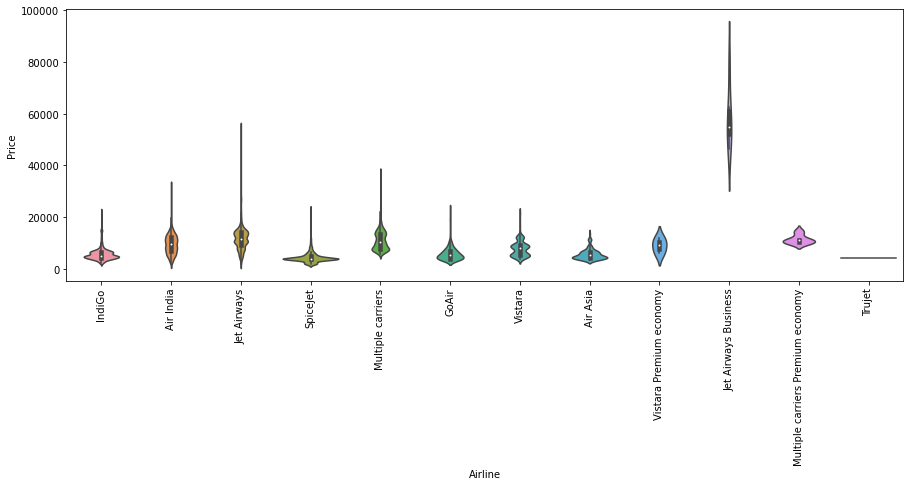

In [172]:
plt.figure(figsize = (15,5))
sns.violinplot(y='Price' , x = 'Airline' , data=data)
plt.xticks(rotation = 'vertical')

In [173]:
np.round(data['Additional_Info'].value_counts()/len(data)*100  , 2 )

No info                         78.11
In-flight meal not included     18.55
No check-in baggage included     3.00
1 Long layover                   0.18
Change airports                  0.07
Business class                   0.04
No Info                          0.03
Red-eye flight                   0.01
2 Long layover                   0.01
1 Short layover                  0.01
Name: Additional_Info, dtype: float64

In [174]:
#We can think of to drop additional info as 78 % data has no info so 

In [175]:
data.drop(columns = ['Additional_Info' , 'Route' ,'Duration_total_mins' , 'Journey_Year' ] , axis  = 1 , inplace = True)

In [176]:
cat_col = [col for col in data.columns if data[col].dtype == 'object']

In [177]:
num_col = [col for col in data.columns if data[col].dtype != 'object']

In [178]:
cat_col

['Airline', 'Source', 'Destination', 'Duration', 'Total_Stops']

In [179]:
for category in data['Source'].unique():
    data['Source_'+ category] = data['Source'].apply(lambda x:1 if x == category else 0)

In [180]:
data.head(3)

,Airline,Source,Destination,Duration,Total_Stops,Price,Journey_day,Journey_Month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_minutes,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,IndiGo,Banglore,New Delhi,2h 50m,non-stop,3897,24,3,22,20,1,10,2,50,1,0,0,0,0
1,Air India,Kolkata,Banglore,7h 25m,2 stops,7662,5,1,5,50,13,15,7,25,0,1,0,0,0
2,Jet Airways,Delhi,Cochin,19h 0m,2 stops,13882,6,9,9,25,4,25,19,0,0,0,1,0,0


In [181]:
data.drop(columns = 'Source' , axis= 1 , inplace  = True)

In [182]:
data.head(3)

,Airline,Destination,Duration,Total_Stops,Price,Journey_day,Journey_Month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_minutes,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,IndiGo,New Delhi,2h 50m,non-stop,3897,24,3,22,20,1,10,2,50,1,0,0,0,0
1,Air India,Banglore,7h 25m,2 stops,7662,5,1,5,50,13,15,7,25,0,1,0,0,0
2,Jet Airways,Cochin,19h 0m,2 stops,13882,6,9,9,25,4,25,19,0,0,0,1,0,0


In [183]:
airlines = data.groupby(['Airline'])['Price'].mean().sort_values().index

In [184]:
Dict1 = {Key:Index for Index , Key in enumerate(airlines,0)}

In [185]:
Dict1

{'Trujet': 0,
 'SpiceJet': 1,
 'Air Asia': 2,
 'IndiGo': 3,
 'GoAir': 4,
 'Vistara': 5,
 'Vistara Premium economy': 6,
 'Air India': 7,
 'Multiple carriers': 8,
 'Multiple carriers Premium economy': 9,
 'Jet Airways': 10,
 'Jet Airways Business': 11}

In [186]:
data['Airline'] = data['Airline'].map(Dict1)

In [187]:
data.head(2)

,Airline,Destination,Duration,Total_Stops,Price,Journey_day,Journey_Month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_minutes,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,New Delhi,2h 50m,non-stop,3897,24,3,22,20,1,10,2,50,1,0,0,0,0
1,7,Banglore,7h 25m,2 stops,7662,5,1,5,50,13,15,7,25,0,1,0,0,0


In [188]:
data['Destination'].replace('New Delhi' , 'Delhi' , inplace = True)

In [189]:
data['Destination']

0           Delhi
1        Banglore
2          Cochin
3        Banglore
4           Delhi
           ...   
10678    Banglore
10679    Banglore
10680       Delhi
10681       Delhi
10682      Cochin
Name: Destination, Length: 10682, dtype: object

In [190]:
dest = data.groupby(['Destination'])['Price'].mean().sort_values().index

In [191]:
dest

Index(['Kolkata', 'Hyderabad', 'Delhi', 'Banglore', 'Cochin'], dtype='object', name='Destination')

In [192]:
Dict2 = {Key:Index for Index, Key in enumerate(dest,0)}

In [193]:
data['Destination'] = data['Destination'].map(Dict2)

In [194]:
data['Destination']

0        2
1        3
2        4
3        3
4        2
        ..
10678    3
10679    3
10680    2
10681    2
10682    4
Name: Destination, Length: 10682, dtype: int64

In [195]:
data.head()

,Airline,Destination,Duration,Total_Stops,Price,Journey_day,Journey_Month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_minutes,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2,2h 50m,non-stop,3897,24,3,22,20,1,10,2,50,1,0,0,0,0
1,7,3,7h 25m,2 stops,7662,5,1,5,50,13,15,7,25,0,1,0,0,0
2,10,4,19h 0m,2 stops,13882,6,9,9,25,4,25,19,0,0,0,1,0,0
3,3,3,5h 25m,1 stop,6218,5,12,18,5,23,30,5,25,0,1,0,0,0
4,3,2,4h 45m,1 stop,13302,3,1,16,50,21,35,4,45,1,0,0,0,0


In [196]:
data['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [197]:
stops = {'non-stop' : 0 , '2 stops':2 , '1 stop':1 , '3 stops':3 , '4 stops':4}

In [198]:
data['Total_Stops']=data['Total_Stops'].map(stops)

In [199]:
def plot(df , col):
    fig , (ax1 , ax2 , ax3) = plt.subplots(3,1)
    sns.distplot(df[col] , ax = ax1)
    sns.boxplot(df[col] , ax = ax2)
    sns.distplot(df[col] , ax = ax3 , kde = False)

C:\Users\Ameen\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\Ameen\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

C:\Users\Ameen\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



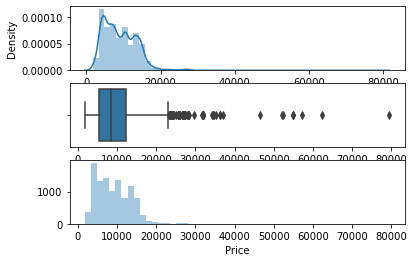

In [200]:
plot(data , 'Price')

In [201]:
data['Price'] = np.where(data['Price']>=35000 , data['Price'].median() , data['Price'])

C:\Users\Ameen\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\Ameen\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

C:\Users\Ameen\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



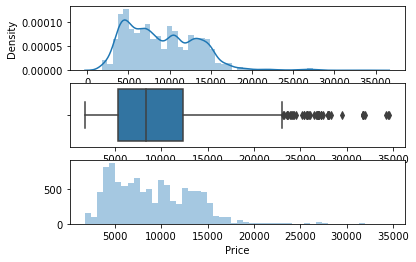

In [202]:
plot(data , 'Price')

In [203]:
data.drop(columns = ["Duration"] , axis = 1 , inplace = True)

In [204]:
data.head(2)

,Airline,Destination,Total_Stops,Price,Journey_day,Journey_Month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_minutes,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2,0,3897.0,24,3,22,20,1,10,2,50,1,0,0,0,0
1,7,3,2,7662.0,5,1,5,50,13,15,7,25,0,1,0,0,0


In [205]:
data.dtypes

Airline                  int64
Destination              int64
Total_Stops              int64
Price                  float64
Journey_day              int64
Journey_Month            int64
Dep_Time_hour            int64
Dep_Time_minute          int64
Arrival_Time_hour        int64
Arrival_Time_minute      int64
Duration_hours           int64
Duration_minutes         int64
Source_Banglore          int64
Source_Kolkata           int64
Source_Delhi             int64
Source_Chennai           int64
Source_Mumbai            int64
dtype: object

In [206]:
from sklearn.feature_selection import mutual_info_regression

In [230]:
X = data.drop(['Price'] , axis = 1)

In [208]:
y = data['Price']

In [209]:
mutual_info_regression(X , y)

array([0.9720972 , 1.00166391, 0.78469953, 0.18932284, 0.23559883,
       0.34522157, 0.26161752, 0.39880038, 0.34195693, 0.4630538 ,
       0.34351494, 0.39146798, 0.45587969, 0.5229967 , 0.13505612,
       0.19414972])

In [210]:
imp = pd.DataFrame(mutual_info_regression(X, y ) , index = X.columns)

In [211]:
imp.columns = ['Importance']

In [212]:
imp.sort_values(by = 'Importance' , ascending = False)

,Importance
Destination,1.002603
Airline,0.976215
Total_Stops,0.783152
Source_Delhi,0.521668
Duration_hours,0.465571
Source_Kolkata,0.462862
Arrival_Time_hour,0.399881
Source_Banglore,0.387239
Arrival_Time_minute,0.351487
Dep_Time_hour,0.350071


In [213]:
from sklearn.model_selection import train_test_split

In [234]:
X_train ,X_test , y_train , y_test = train_test_split(X , y, test_size = 0.25 , random_state = 42)

In [235]:
from sklearn.ensemble import RandomForestRegressor

In [236]:
ml_model = RandomForestRegressor()

In [237]:
model = ml_model.fit(X_train , y_train)

In [241]:
y_pred = model.predict(X_test)

In [242]:
!pip install pickle

ERROR: Could not find a version that satisfies the requirement pickle (from versions: none)
ERROR: No matching distribution found for pickle


In [243]:
import pickle

In [244]:
file  = open(r'C:\Users\Ameen\ML PROJECTS\Predict Prices of Airline Tickets/rf_random.pkl','wb')

In [245]:
pickle.dump(model , file)

In [246]:
model = open(r'C:\Users\Ameen\ML PROJECTS\Predict Prices of Airline Tickets/rf_random.pkl','rb')

In [252]:
forest = pickle.load(model)

EOFError: Ran out of input

In [253]:
forest.predict(X_test)

array([16762.37,  6527.64,  8773.36, ...,  3471.38,  6030.56,  7035.4 ])

In [256]:
def mape(y_true , y_pred):
    y_true , y_pred = np.array(y_true) , np.array(y_pred)
    return np.mean(np.abs((y_true-y_pred)/y_true))*100

In [257]:
mape(y_test , forest.predict(X_test))

13.305969845939385

In [277]:
def predict(ml_model):
    model = ml_model.fit(X_train,y_train)
    print('training_score: {}'.format(model.score(X_train,y_train)))
    y_prediction = model.predict(X_test)
    print("Prediction are:{}".format(y_prediction))
    print('\n')
    
    from sklearn import metrics
    r2_score = metrics.r2_score(y_test , y_prediction)
    print('r2_score: {}'.format(r2_score))
    print('MSE :' , metrics.mean_squared_error(y_test , y_prediction))
    print('MAE :' , metrics.mean_absolute_error(y_test , y_prediction))
    print('RMSE :' , np.sqrt(metrics.mean_squared_error(y_test , y_prediction)))
    print('MAPE: ' , mape(y_test , y_prediction))
    sns.distplot(y_test-y_prediction)

training_score: 0.9515560053744019
Prediction are:[16750.33  6414.38  8766.55 ...  3566.42  6332.23  6974.18]


r2_score: 0.8051139653786271
MSE : 3793963.302392045
MAE : 1187.4638784118663
RMSE : 1947.8098732658805
MAPE:  13.289573553372941


C:\Users\Ameen\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



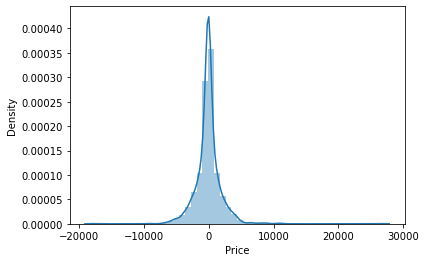

In [278]:
predict(RandomForestRegressor())